Default threshold (0.5):
              precision    recall  f1-score   support

           0     0.9946    0.9783    0.9864      3403
           1     0.6769    0.8960    0.7711       173

    accuracy                         0.9743      3576
   macro avg     0.8357    0.9371    0.8788      3576
weighted avg     0.9792    0.9743    0.9760      3576



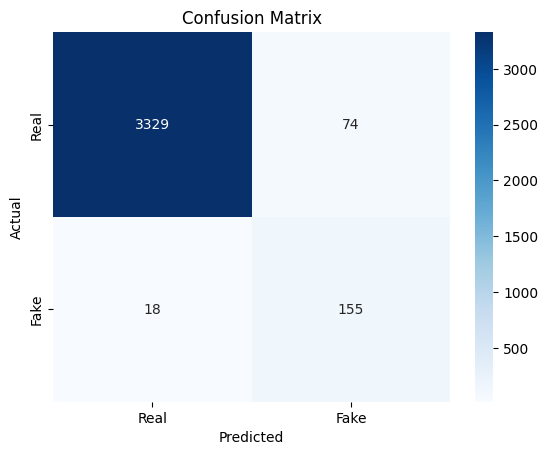

['vectorizer.joblib']

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === Load dataset ===
df = pd.read_csv("../data/fake_job_postings.csv")

# === Fill missing text fields ===
text_cols = ['title', 'company_profile', 'description', 'requirements', 'benefits']
for col in text_cols:
    df[col] = df[col].fillna("")

# === Combine all text into one field ===
df['text'] = df['title'] + " " + df['company_profile'] + " " + df['description'] + " " + df['requirements'] + " " + df['benefits']

# === Prepare clean dataset ===
df_clean = df[['text', 'fraudulent']].copy()

# === Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(df_clean['text'], df_clean['fraudulent'], test_size=0.2, random_state=42, stratify=df_clean['fraudulent'])

# === TF-IDF Vectorization ===
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# === Train classifier with class balancing ===
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

# === Predict & evaluate ===
y_pred = model.predict(X_test_tfidf)
print("Default threshold (0.5):")
print(classification_report(y_test, y_pred, digits=4))

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

import joblib
joblib.dump(model, "model.joblib")
joblib.dump(vectorizer, "vectorizer.joblib")

